In [99]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Loading data

In [100]:
covid_USdata=pd.read_csv('covid19_dailyreport_us.csv',parse_dates=['Last_Update'])

### EDA

In [101]:
covid_USdata.head()

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,US,2020-05-21 02:32:54,32.3182,-86.9023,13052,522,NaN,12530.0,1,266.194321,164450.0,1493.0,3.999387,84000001,USA,3353.942386,11.438860
1,Alaska,US,2020-05-21 02:32:54,61.3707,-152.4044,401,10,352.0,39.0,2,54.815493,37045.0,NaN,2.493766,84000002,USA,5063.940017,NaN
2,American Samoa,US,2020-05-21 02:32:54,-14.2710,-170.1320,0,0,NaN,0.0,60,0.000000,124.0,NaN,NaN,16,ASM,222.857246,NaN
3,Arizona,US,2020-05-21 02:32:54,33.7298,-111.4312,14906,747,3773.0,10386.0,4,204.788838,165435.0,1792.0,5.011405,84000004,USA,2272.859351,12.022005
4,Arkansas,US,2020-05-21 02:32:54,34.9697,-92.3731,5003,107,3852.0,1044.0,5,165.782801,96258.0,535.0,2.138717,84000005,USA,3189.670370,10.693584


In [102]:
covid_USdata.shape

(58, 18)

Obs: We have very less data to work

In [103]:
covid_USdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Province_State        58 non-null     object        
 1   Country_Region        58 non-null     object        
 2   Last_Update           58 non-null     datetime64[ns]
 3   Lat                   56 non-null     float64       
 4   Long_                 56 non-null     float64       
 5   Confirmed             58 non-null     int64         
 6   Deaths                58 non-null     int64         
 7   Recovered             42 non-null     float64       
 8   Active                58 non-null     float64       
 9   FIPS                  58 non-null     int64         
 10  Incident_Rate         56 non-null     float64       
 11  People_Tested         56 non-null     float64       
 12  People_Hospitalized   33 non-null     float64       
 13  Mortality_Rate        

Obs: Dataset contains float,int and object datatypes

#### Checking for '?' values

In [104]:
covid_USdata[covid_USdata=='?'].count()

Province_State          0
Country_Region          0
Last_Update             0
Lat                     0
Long_                   0
Confirmed               0
Deaths                  0
Recovered               0
Active                  0
FIPS                    0
Incident_Rate           0
People_Tested           0
People_Hospitalized     0
Mortality_Rate          0
UID                     0
ISO3                    0
Testing_Rate            0
Hospitalization_Rate    0
dtype: int64

obs: No '?' values present

#### Checking for NaN/null values

In [105]:
covid_USdata.isnull().sum()

Province_State           0
Country_Region           0
Last_Update              0
Lat                      2
Long_                    2
Confirmed                0
Deaths                   0
Recovered               16
Active                   0
FIPS                     0
Incident_Rate            2
People_Tested            2
People_Hospitalized     25
Mortality_Rate           1
UID                      0
ISO3                     0
Testing_Rate             2
Hospitalization_Rate    25
dtype: int64

Obs: Latitude,Longitude,Recovered,Incident_rate,People_tested,People_Hospitalized,Morality_rate,tetsing rate,Hospitalization_Rate have NaN values

In [106]:
covid_USdata['Last_Update'].unique()

array(['2020-05-21T02:32:54.000000000'], dtype='datetime64[ns]')

In [107]:
covid_USdata

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,US,2020-05-21 02:32:54,32.3182,-86.9023,13052,522,NaN,12530.0,1,266.194321,164450.0,1493.0,3.999387,84000001,USA,3353.942386,11.438860
1,Alaska,US,2020-05-21 02:32:54,61.3707,-152.4044,401,10,352.0,39.0,2,54.815493,37045.0,NaN,2.493766,84000002,USA,5063.940017,NaN
2,American Samoa,US,2020-05-21 02:32:54,-14.2710,-170.1320,0,0,NaN,0.0,60,0.000000,124.0,NaN,NaN,16,ASM,222.857246,NaN
3,Arizona,US,2020-05-21 02:32:54,33.7298,-111.4312,14906,747,3773.0,10386.0,4,204.788838,165435.0,1792.0,5.011405,84000004,USA,2272.859351,12.022005
4,Arkansas,US,2020-05-21 02:32:54,34.9697,-92.3731,5003,107,3852.0,1044.0,5,165.782801,96258.0,535.0,2.138717,84000005,USA,3189.670370,10.693584
5,California,US,2020-05-21 02:32:54,36.1162,-119.6816,85997,3497,NaN,82500.0,6,217.646575,1380120.0,NaN,4.066421,84000006,USA,3492.893832,NaN
6,Colorado,US,2020-05-21 02:32:54,39.0598,-105.3111,22797,1299,3478.0,18020.0,8,395.868121,131837.0,3955.0,5.698118,84000008,USA,2289.339188,17.348774
7,Connecticut,US,2020-05-21 02:32:54,41.5978,-72.7554,39017,3529,6264.0,29224.0,9,1094.357902,190718.0,10946.0,9.044775,84000009,USA,5349.302875,28.054438
8,Delaware,US,2020-05-21 02:32:54,39.3185,-75.5071,8194,310,3965.0,3919.0,10,841.476990,45412.0,NaN,3.783256,84000010,USA,4663.552976,NaN
9,Diamond Princess,US,2020-05-21 02:32:54,NaN,NaN,49,0,NaN,49.0,88888,NaN,NaN,NaN,0.000000,84088888,USA,NaN,NaN


Most of the data points for states 'American Samoa' and 'Diamond Princess' is NaN hence removing these states to escape from false analysis

In [108]:
covid_USdata.drop([2,9],axis=0,inplace=True)

In [109]:
covid_USdata.isnull().sum()

Province_State           0
Country_Region           0
Last_Update              0
Lat                      1
Long_                    1
Confirmed                0
Deaths                   0
Recovered               14
Active                   0
FIPS                     0
Incident_Rate            1
People_Tested            1
People_Hospitalized     23
Mortality_Rate           0
UID                      0
ISO3                     0
Testing_Rate             1
Hospitalization_Rate    23
dtype: int64

#### Dealing with Null values

In [110]:
# To do safe data analysis we are replacing null recovered cases with 0 rather than taking mean since it is sensitive data
covid_USdata['Recovered']=covid_USdata['Recovered'].fillna(0.0)
#same with people Hospitalized
covid_USdata['People_Hospitalized']=covid_USdata['People_Hospitalized'].fillna(0.0)
# using morality rate formula and Hospitalization rate formula
covid_USdata['Mortality_Rate']=(covid_USdata['Deaths']/covid_USdata['Confirmed'])*100.0
covid_USdata['Hospitalization_Rate']=(covid_USdata['People_Hospitalized']/covid_USdata['Confirmed'])*100.0
# Incident_rate is confirmed_cases/100000 people therefore if Incident_rate is null it means 100000 cases have not been tested in that state hence filling in 0
covid_USdata['Incident_Rate'].fillna(value=covid_USdata['Confirmed'], inplace=True)
# in cases where 0/0 will come Morality_rate and hospitalization_rate will give NaN value hence manually filling it
covid_USdata['Mortality_Rate'].fillna(value=0.0, inplace=True)
covid_USdata['Hospitalization_Rate'].fillna(value=0.0, inplace=True)
#considering mean for Lat and Lon
covid_USdata['Lat'].replace(np.nan,covid_USdata['Lat'].mean(),inplace=True)
covid_USdata['Long_'].replace(np.nan,covid_USdata['Long_'].mean(),inplace=True)
# Testing rate is total number of people who have been tested..if this is null we are replacing this with confirmed cases considering atleast confirmed cases are tested till time
covid_USdata['Testing_Rate'].fillna(value=covid_USdata['Confirmed'], inplace=True)
covid_USdata['People_Tested'].fillna(value=covid_USdata['Confirmed'], inplace=True)

In [111]:
covid_USdata.isnull().sum()

Province_State          0
Country_Region          0
Last_Update             0
Lat                     0
Long_                   0
Confirmed               0
Deaths                  0
Recovered               0
Active                  0
FIPS                    0
Incident_Rate           0
People_Tested           0
People_Hospitalized     0
Mortality_Rate          0
UID                     0
ISO3                    0
Testing_Rate            0
Hospitalization_Rate    0
dtype: int64

In [112]:
covid_USdata.describe()

,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,Testing_Rate,Hospitalization_Rate
count,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,5.600000e+01,56.000000,56.000000,5.600000e+01,56.000000,56.000000
mean,37.769382,-83.662516,27710.785714,1668.553571,5255.571429,20786.660714,1817.160714,398.070091,2.258530e+05,2886.000000,4.537860,7.800185e+07,3892.046562,8.451855
std,8.376563,48.394089,53257.099864,4146.586074,10534.475856,41858.418534,13358.660523,401.071826,2.987837e+05,10347.268857,2.067190,2.182945e+07,1937.369699,8.094135
min,13.444300,-157.498300,21.000000,2.000000,0.000000,2.000000,1.000000,38.082112,1.030000e+02,0.000000,1.101269,3.160000e+02,97.702058,0.000000
25%,34.937400,-99.525100,3567.250000,86.750000,9.750000,1024.750000,17.750000,148.521021,4.608100e+04,0.000000,3.203221,8.400001e+07,2712.800274,0.000000
50%,39.061850,-86.797300,11325.000000,400.000000,1187.500000,6204.500000,31.500000,250.477287,1.386545e+05,223.000000,4.409323,8.400003e+07,3469.782532,8.756614
75%,42.361650,-76.970625,30304.000000,1493.750000,4448.000000,19762.750000,46.250000,477.888542,2.796948e+05,1819.250000,5.487604,8.400004e+07,4763.649736,15.775153
max,61.370700,145.673900,354370.000000,28636.000000,61886.000000,263848.000000,99999.000000,1821.620216,1.505836e+06,76410.000000,9.545549,8.410000e+07,11377.424693,28.054438


Obs:

1.All states have widely data in terms of confirmed ,Deaths,Recovered and Active cases

2. Min number of total people tested is 103 and maximum is 1505836 hence Range is very high

3. Testing rate also have very high range with min value 0f 97 and maximum of 11377 people tested per 100000 people

4. Maximum no of people hospitalized in the day is 76410

5. Maximum numnber of total people tested in the day is 1505836

6. No of active cases varies largely with minimum of 2 to 263848 in the day

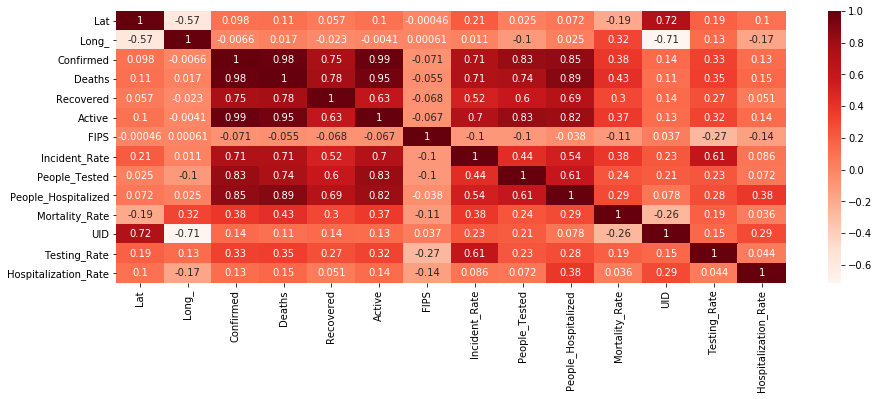

In [113]:
plt.figure(figsize=(15,5))
import seaborn as sb
sb.heatmap(covid_USdata.corr(),annot=True,cmap='Reds')

Obs: Deaths have highest correlation with confirmed and active cases

People_hospitalized also have very high positive correlation with Confirmed cases which is good

Testing rate is also strongly positively related to Incident rate

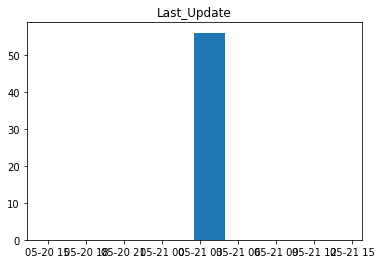

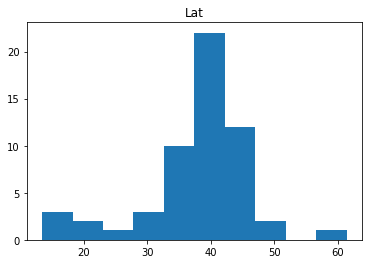

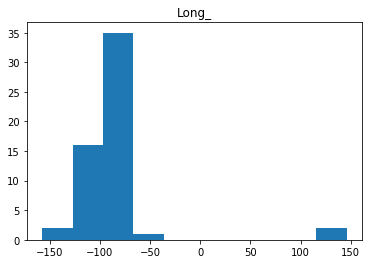

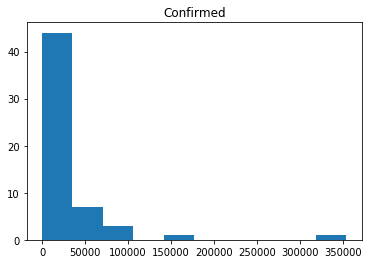

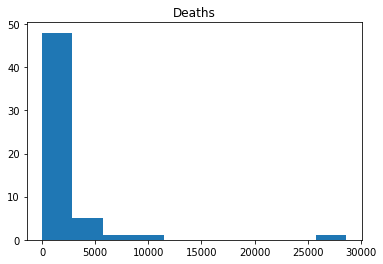

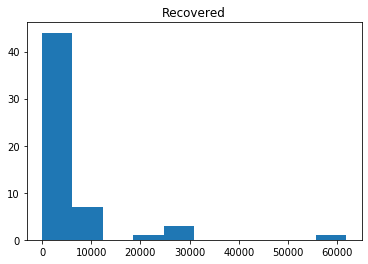

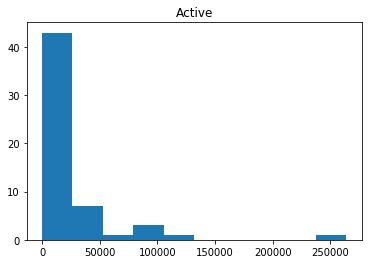

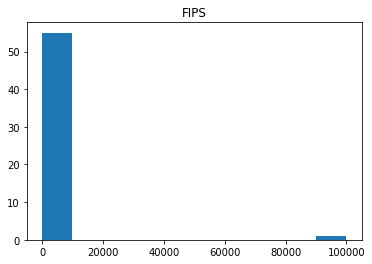

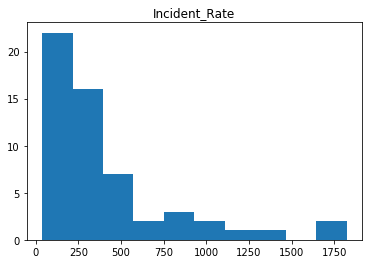

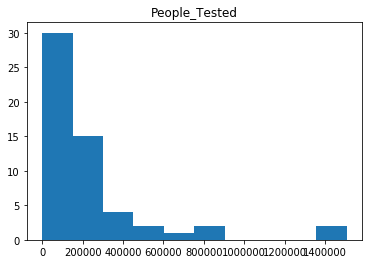

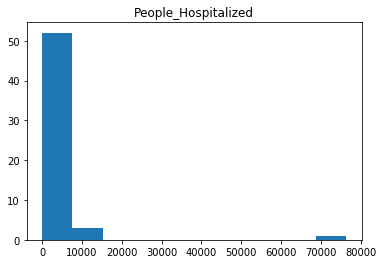

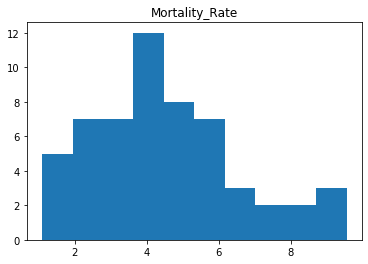

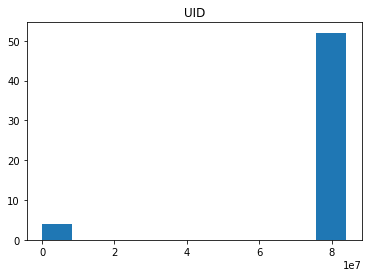

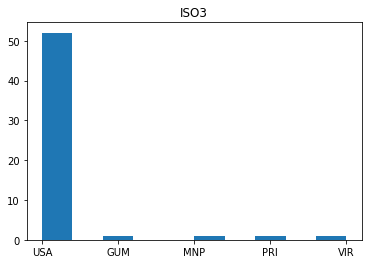

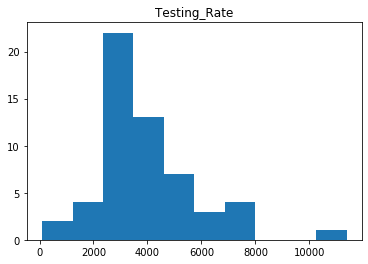

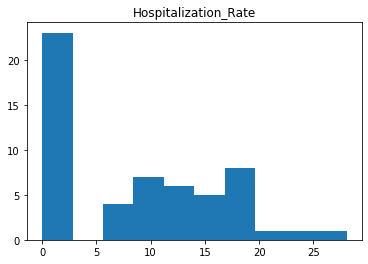

In [114]:
#viewing distribution of all attributes
for i in covid_USdata.iloc[:,2:].columns:
    plt.subplots()
    plt.hist(x=covid_USdata[i])
    plt.title(i)
    

Obs: Data present for only 21st May

Almost all states have Latitude between 30 to 50 and longitude -150 to -50

Distorted distribution for Confirmed,Deaths,Recovered and Active cases

Most of the states have number of confirmed cases between 0 to 5000

Most of the states have number of Deaths between 0 to 5000

Most of the states have number of Recovered cases between 0 to 10000

Most of the states have Active cases between 0 to 5000

Incident rate for majority of states is between 0 to 500

In majority of states people tested are in range 0 to 30000

People hospitalized range is between 0 to 5000 for most states

Highest seen mortality rate is 4

Mostly all attributes are left skewed 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55]),
 <a list of 56 Text xticklabel objects>)

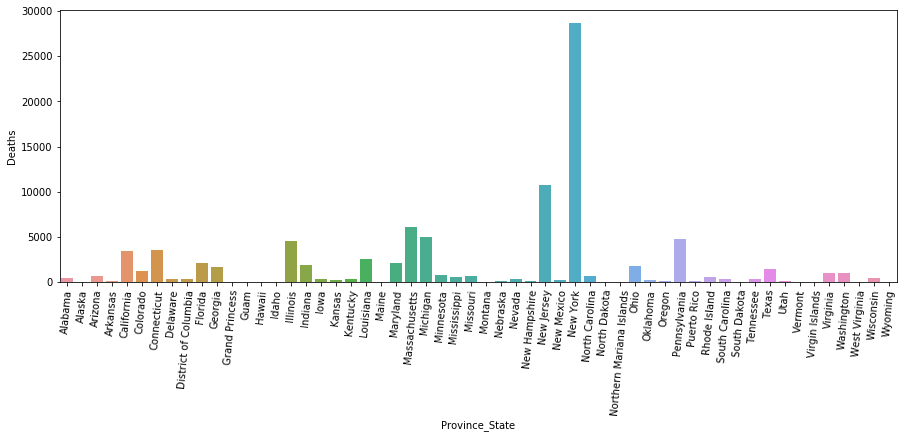

In [115]:
#viewing deaths happended in each state
plt.figure(figsize=(15,5))
sb.barplot(x='Province_State',y='Deaths',data=covid_USdata)
plt.xticks(rotation=85)

Obs: Maximum deaths happened in NewYork followed by new Jersey

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55]),
 <a list of 56 Text xticklabel objects>)

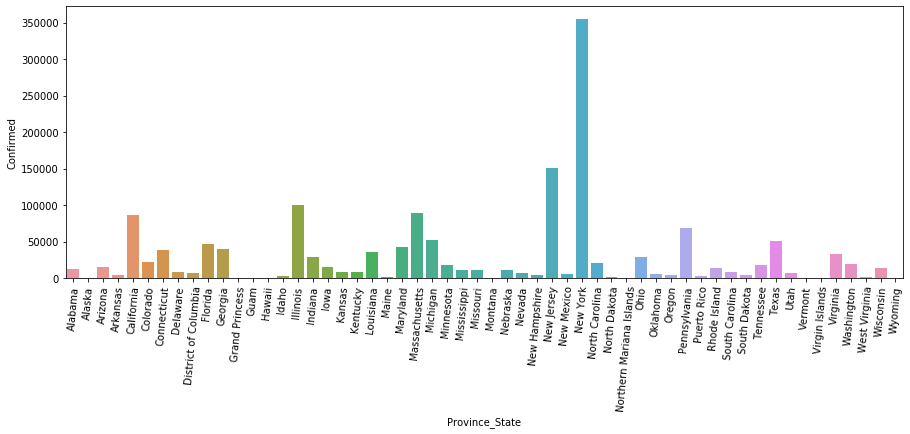

In [116]:
##viewing recovered cases in each state
plt.figure(figsize=(15,5))
sb.barplot(x='Province_State',y='Confirmed',data=covid_USdata)
plt.xticks(rotation=85)

Obs: Number of confirmed cases are highest in Newyork followed by new jersey

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55]),
 <a list of 56 Text xticklabel objects>)

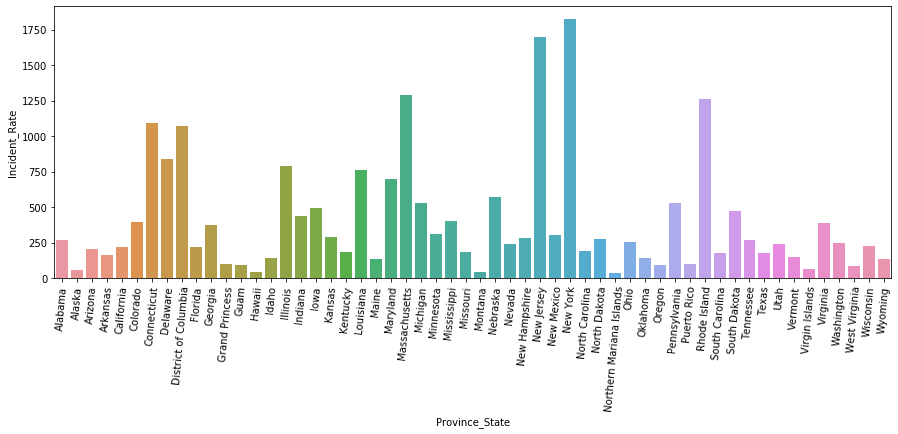

In [117]:
##viewing state wise incident_rate
plt.figure(figsize=(15,5))
sb.barplot(x='Province_State',y='Incident_Rate',data=covid_USdata)
plt.xticks(rotation=85)

Obs: Incident rate is greater than 1000 for NewYork,NewJersey,Massachusetts,Connecticut,District of Columbia and Rhode Island

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55]),
 <a list of 56 Text xticklabel objects>)

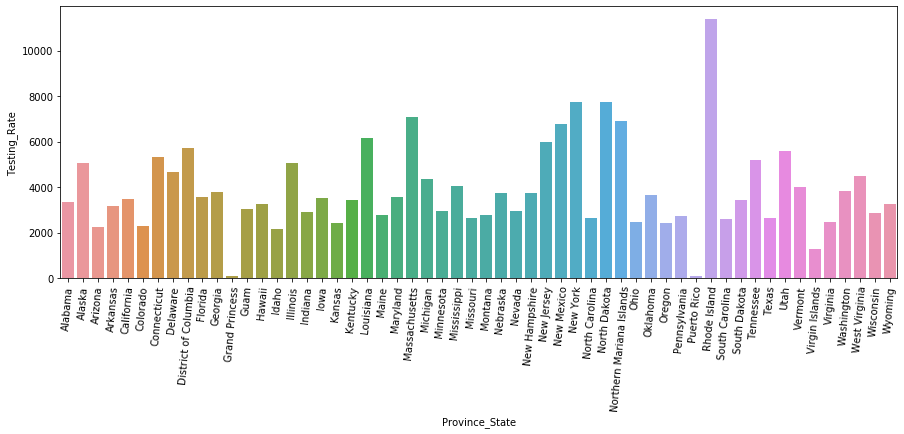

In [118]:
##viewing state wise testing_rate
plt.figure(figsize=(15,5))
sb.barplot(x='Province_State',y='Testing_Rate',data=covid_USdata)
plt.xticks(rotation=85)

Obs: Testing rate is highest for Rhode Island

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55]),
 <a list of 56 Text xticklabel objects>)

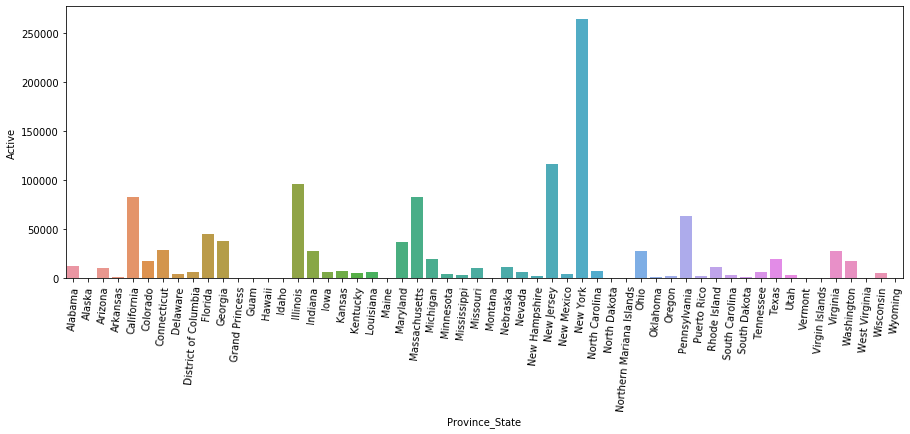

In [119]:
# State wise Active cases 
plt.figure(figsize=(15,5))
sb.barplot(x='Province_State',y='Active',data=covid_USdata)
plt.xticks(rotation=85)

Obs: Highest active cases are in New York followed by New Jersey

(array([-2000.,     0.,  2000.,  4000.,  6000.,  8000., 10000., 12000.]),
 <a list of 8 Text xticklabel objects>)

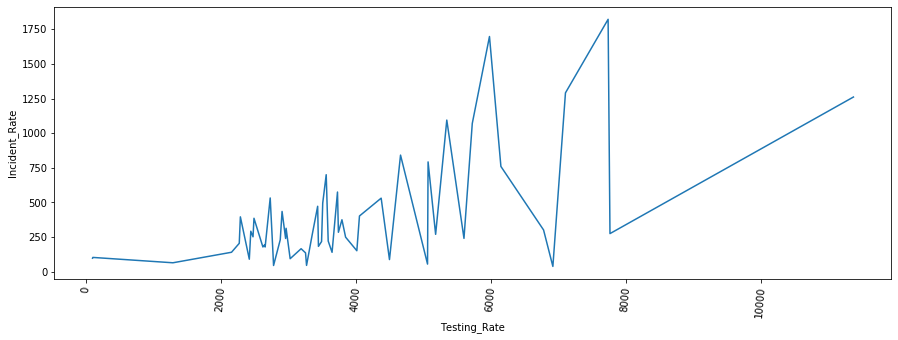

In [120]:
# checking curve for testing rate vs incident rate
plt.figure(figsize=(15,5))
sb.lineplot(x='Testing_Rate',y='Incident_Rate',data=covid_USdata)
plt.xticks(rotation=85)

Obs : Tetsing vs Incident rate is increasing linearly after 8000

 Curve is not following a fixed pattern but is in increasing trend

(array([-200000.,       0.,  200000.,  400000.,  600000.,  800000.,
        1000000., 1200000., 1400000., 1600000.]),
 <a list of 10 Text xticklabel objects>)

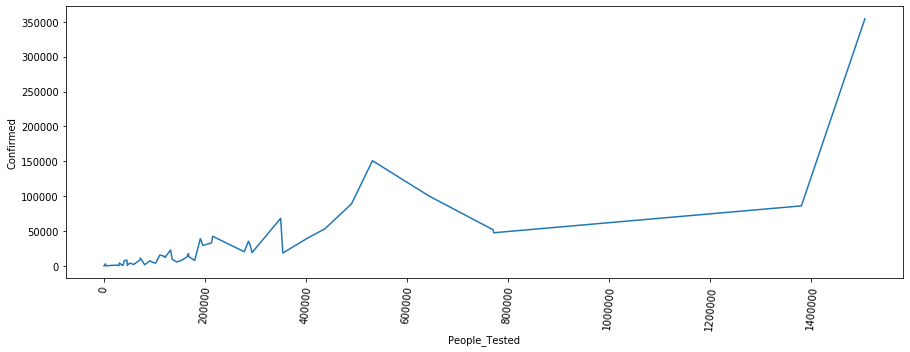

In [121]:
# checking curve for people tested vs confirmed cases
plt.figure(figsize=(15,5))
sb.lineplot(x='People_Tested',y='Confirmed',data=covid_USdata)
plt.xticks(rotation=85)

confirmed cases are increasing drastically when no of people tested is crossing 1400000

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55]),
 <a list of 56 Text xticklabel objects>)

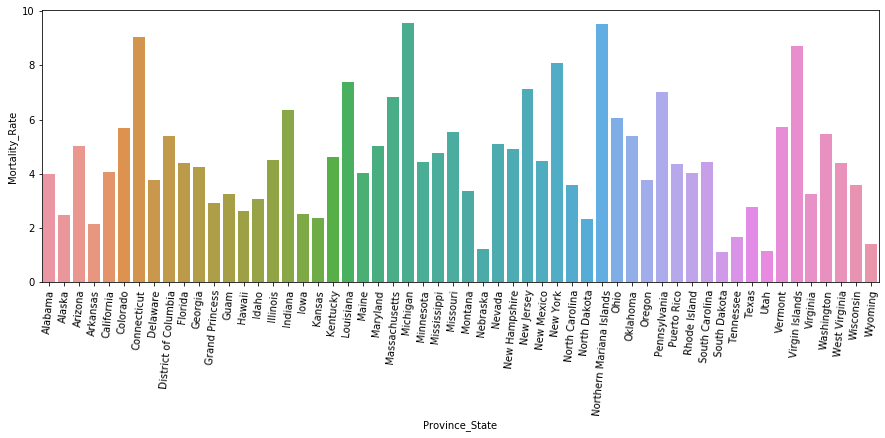

In [122]:
#checking state wise mortality rate
plt.figure(figsize=(15,5))
sb.barplot(x='Province_State',y='Mortality_Rate',data=covid_USdata)
plt.xticks(rotation=85)

Obs: Michigan,Connecticut and Mariana Island have highest mortality rates

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55]),
 <a list of 56 Text xticklabel objects>)

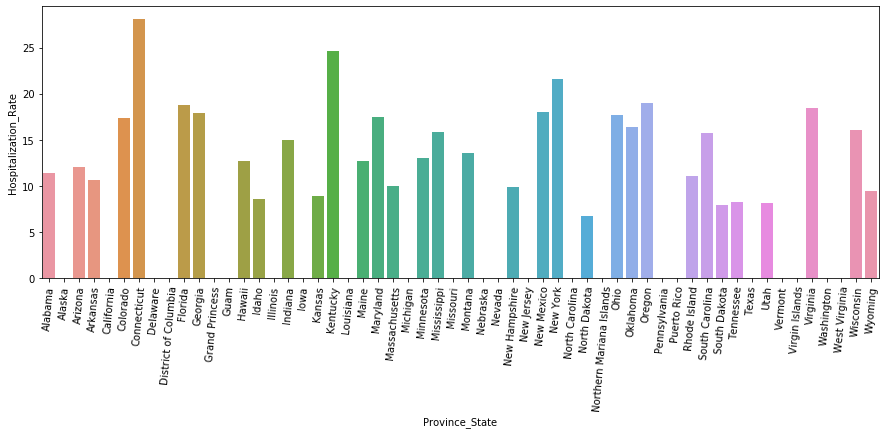

In [123]:
#checking state wise hospitalization rate
plt.figure(figsize=(15,5))
sb.barplot(x='Province_State',y='Hospitalization_Rate',data=covid_USdata)
plt.xticks(rotation=85)

Obs: Hospitalization rate is highest for Connecticut followed by Kentucky

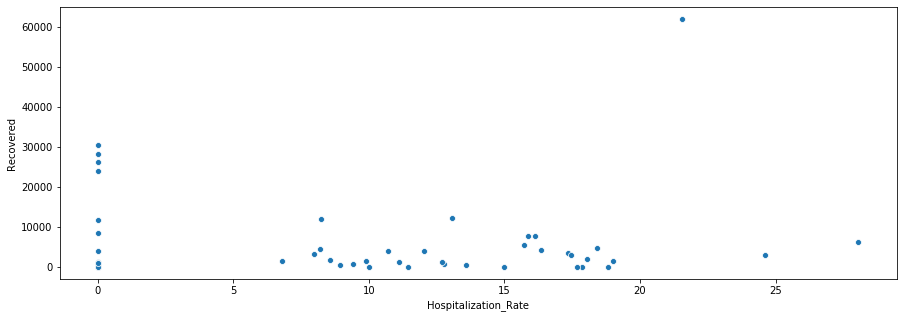

In [124]:
# checking Hospitalization rate vs Recovery
plt.figure(figsize=(15,5))
sb.scatterplot(x='Hospitalization_Rate',y='Recovered',data=covid_USdata)

Obs: Hospitalization rate is not having much impact on Recovered cases

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22]),
 <a list of 23 Text xticklabel objects>)

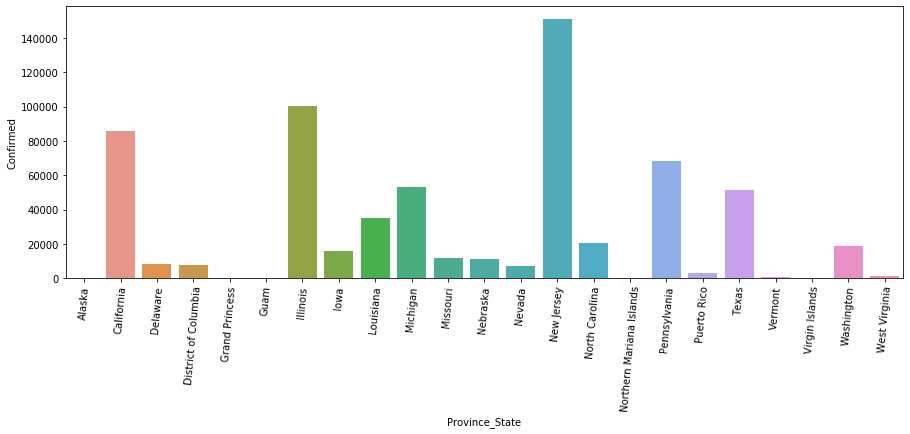

In [125]:
# viewing confirmed cases count where hospitalized people count is 0
plt.figure(figsize=(15,5))
sb.barplot(x='Province_State',y='Confirmed',data=covid_USdata[covid_USdata['People_Hospitalized']==0])
plt.xticks(rotation=85)

Obs: New Jersey have highest confirmed cases with 0 people hospitalized

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42]),
 <a list of 43 Text xticklabel objects>)

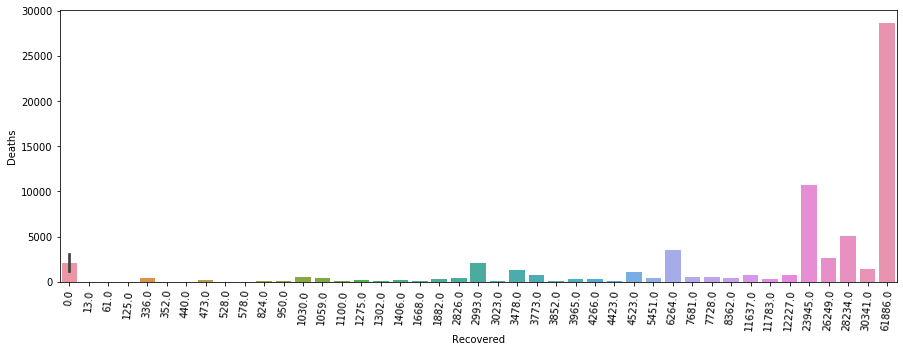

In [126]:
plt.figure(figsize=(15,5))
sb.barplot(x='Recovered',y='Deaths',data=covid_USdata)
plt.xticks(rotation=85)

When number of recovered cases are less than 1000 then in those states Number of deaths is comparitively low

Lat                         AxesSubplot(0.125,0.71587;0.168478x0.16413)
Long_                    AxesSubplot(0.327174,0.71587;0.168478x0.16413)
Confirmed                AxesSubplot(0.529348,0.71587;0.168478x0.16413)
Deaths                   AxesSubplot(0.731522,0.71587;0.168478x0.16413)
Recovered                  AxesSubplot(0.125,0.518913;0.168478x0.16413)
Active                  AxesSubplot(0.327174,0.518913;0.168478x0.16413)
FIPS                    AxesSubplot(0.529348,0.518913;0.168478x0.16413)
Incident_Rate           AxesSubplot(0.731522,0.518913;0.168478x0.16413)
People_Tested              AxesSubplot(0.125,0.321957;0.168478x0.16413)
People_Hospitalized     AxesSubplot(0.327174,0.321957;0.168478x0.16413)
Mortality_Rate          AxesSubplot(0.529348,0.321957;0.168478x0.16413)
UID                     AxesSubplot(0.731522,0.321957;0.168478x0.16413)
Testing_Rate                  AxesSubplot(0.125,0.125;0.168478x0.16413)
Hospitalization_Rate       AxesSubplot(0.327174,0.125;0.168478x0

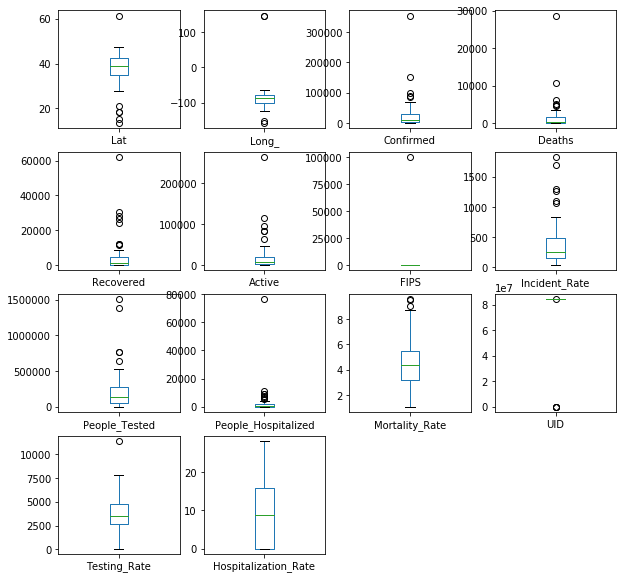

In [127]:
covid_USdata.plot(kind='box',subplots=True,layout=(4,4),figsize=(10,10))

Obs: Since Confirmed,Deaths ,Recovered,Active,Incident_rate, People Tested varies widely for all states hence they have outliers

Since we already have very less data we will not be removing outliers instead noramlizing the data and prepare the model

#### Checking Skewness

In [128]:
covid_data=covid_USdata.copy().iloc[:,[3,4,5,6,7,8,10,11,12,13,16,17]]
covid_data.skew()

Lat                    -0.922073
Long_                   3.816172
Confirmed               4.646240
Deaths                  5.404070
Recovered               3.587378
Active                  4.116514
Incident_Rate           1.975851
People_Tested           2.783157
People_Hospitalized     6.771326
Mortality_Rate          0.621561
Testing_Rate            1.273878
Hospitalization_Rate    0.350167
dtype: float64

Obs: All attributes except mortality rate and Hospitalization_rate are considerably skewed

#### Dealing with Skewness using yeo Johnson's method

In [129]:
from sklearn.preprocessing import PowerTransformer
pt=[]
k=0
for i in covid_data:
    if((abs(covid_data[i].skew())>0.55) ):  
        pt.append(PowerTransformer())
        pt[k].fit(covid_data[i].values.reshape(-1,1))
        covid_data[i]=pt[k].transform(covid_data[i].values.reshape(-1,1))
        k=k+1

In [130]:
covid_data.skew()

Lat                     0.196471
Long_                  -0.119387
Confirmed              -0.015513
Deaths                 -0.020000
Recovered              -0.217659
Active                 -0.067479
Incident_Rate           0.002823
People_Tested           0.016211
People_Hospitalized    -0.027777
Mortality_Rate         -0.012897
Testing_Rate            0.215201
Hospitalization_Rate    0.350167
dtype: float64

Obs: Skewness removed from dataset

In [131]:
covid_data.head()

,Lat,Long_,Confirmed,Deaths,Recovered,Active,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,Testing_Rate,Hospitalization_Rate
0,-0.766506,0.132518,0.138491,0.163085,-1.445883,0.410367,0.019088,0.186098,0.807582,-0.150677,-0.192991,11.438860
1,3.761174,-2.835562,-1.454802,-1.553211,-0.230778,-1.603688,-1.736145,-0.792010,-1.126852,-1.021327,0.672127,0.000000
3,-0.602849,-0.907451,0.217880,0.346988,0.602948,0.314138,-0.268924,0.190764,0.858318,0.342921,-0.825120,12.022005
4,-0.454221,-0.091135,-0.388811,-0.594690,0.611466,-0.670861,-0.502069,-0.206280,0.524782,-1.260634,-0.283688,10.693584
5,-0.312748,-1.277612,1.433085,1.194960,-1.445883,1.540210,-0.201913,2.354453,-1.126852,-0.116101,-0.117518,0.000000


In [132]:
x=covid_data.drop(['Deaths'],axis=1)
y=covid_data['Deaths']


#### Scaling the data:

In [133]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
ss=StandardScaler()
mm=MinMaxScaler()
ss.fit(x)
mm.fit(x)
x_sscaled=ss.transform(x)
x_mmscaled=mm.transform(x)

In [134]:
x.head()

,Lat,Long_,Confirmed,Recovered,Active,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,Testing_Rate,Hospitalization_Rate
0,-0.766506,0.132518,0.138491,-1.445883,0.410367,0.019088,0.186098,0.807582,-0.150677,-0.192991,11.438860
1,3.761174,-2.835562,-1.454802,-0.230778,-1.603688,-1.736145,-0.792010,-1.126852,-1.021327,0.672127,0.000000
3,-0.602849,-0.907451,0.217880,0.602948,0.314138,-0.268924,0.190764,0.858318,0.342921,-0.825120,12.022005
4,-0.454221,-0.091135,-0.388811,0.611466,-0.670861,-0.502069,-0.206280,0.524782,-1.260634,-0.283688,10.693584
5,-0.312748,-1.277612,1.433085,-1.445883,1.540210,-0.201913,2.354453,-1.126852,-0.116101,-0.117518,0.000000


In [135]:
pd.DataFrame(x_sscaled).head()

,0,1,2,3,4,5,6,7,8,9,10
0,-0.766506,0.132518,0.138491,-1.445883,0.410367,0.019088,0.186098,0.807582,-0.150677,-0.192991,0.372373
1,3.761174,-2.835562,-1.454802,-0.230778,-1.603688,-1.736145,-0.792010,-1.126852,-1.021327,0.672127,-1.053645
2,-0.602849,-0.907451,0.217880,0.602948,0.314138,-0.268924,0.190764,0.858318,0.342921,-0.825120,0.445070
3,-0.454221,-0.091135,-0.388811,0.611466,-0.670861,-0.502069,-0.206280,0.524782,-1.260634,-0.283688,0.279464
4,-0.312748,-1.277612,1.433085,-1.445883,1.540210,-0.201913,2.354453,-1.126852,-0.116101,-0.117518,-1.053645


#### Checking skewness after scalng data

In [136]:
pd.DataFrame(x_sscaled).skew()

0     0.196471
1    -0.119387
2    -0.015513
3    -0.217659
4    -0.067479
5     0.002823
6     0.016211
7    -0.027777
8    -0.012897
9     0.215201
10    0.350167
dtype: float64

In [137]:
pd.DataFrame(x_mmscaled).skew()

0     0.196471
1    -0.119387
2    -0.015513
3    -0.217659
4    -0.067479
5     0.002823
6     0.016211
7    -0.027777
8    -0.012897
9     0.215201
10    0.350167
dtype: float64

Obs : Skewness is not disturbed

### Preparing the model:

In [138]:
#importing libraries for model
import sklearn
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn import model_selection
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
import warnings
warnings.filterwarnings('ignore')

In [139]:
# checking which scaling technique is giving better results
for k in [x,x_sscaled,x_mmscaled]:
    
    model=LinearRegression()
    
    train_x,test_x,train_y,test_y=train_test_split(k,y,test_size=0.2,random_state=42)
    model.fit(train_x,train_y)
    pred=model.predict(test_x)
    
    print('r2_score :',r2_score(test_y,pred))

r2_score : 0.9714070202714928
r2_score : 0.9714070202714848
r2_score : 0.971407020271485


Obs: Both scaling giving similar results hence we can proceed with any of the scaling technique

In [140]:
# preparing a method to get metric at best random state
def max_r2_score(x,y,test_size,model):
    max=0
    ind=0
    for i in range(42,100):
        train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=test_size,random_state=i)
        model.fit(train_x,train_y)
        pred=model.predict(test_x)
        if(max < r2_score(test_y,pred)):
                max=r2_score(test_y,pred)
                ind=i
    train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=test_size,random_state=ind)
    model.fit(train_x,train_y)
    pred=model.predict(test_x)
    print('max r2_score :',r2_score(test_y,pred),'at random state',ind)
    list_r2score.append(r2_score(test_y,pred))
    list_MSE.append(mean_squared_error(test_y,pred))
    list_MAE.append(mean_absolute_error(test_y,pred))
    list_RMSE.append(np.sqrt(mean_absolute_error(test_y,pred)))
    score=cross_val_score(model,x,y,cv=5,scoring='r2')
    #print('standard deviation',score.std())
    cross_val_r2Score.append(score.mean())

In [141]:
list_r2score=[]
list_MSE=[]
list_MAE=[]
list_RMSE=[]
cross_val_r2Score=[]
model_list=[LinearRegression(),DecisionTreeRegressor(),KNeighborsRegressor(),Lasso(alpha=0.1),
            Ridge(alpha=0.1),ElasticNet(),SVR()]
for i,k in zip(model_list,['LinearRegression','DecisionTree','KNN','Lasso','Ridge','ElasticNet','SVR']):
    print('**********************************',k,'****************************************')
    max_r2_score(x,y,0.2,i)
    print('\n')

********************************** LinearRegression ****************************************
max r2_score : 0.9957544580260081 at random state 83


********************************** DecisionTree ****************************************
max r2_score : 0.9451186104526128 at random state 42


********************************** KNN ****************************************
max r2_score : 0.8302511746096592 at random state 94


********************************** Lasso ****************************************
max r2_score : 0.9876280227979027 at random state 55


********************************** Ridge ****************************************
max r2_score : 0.9954716172594283 at random state 83


********************************** ElasticNet ****************************************
max r2_score : 0.6618976974981922 at random state 91


********************************** SVR ****************************************
max r2_score : 0.9386978848870828 at random state 46




#### Summary of model performance:

In [142]:
col=['LinearRegression','DecisionTree','KNN','Lasso','Ridge','ElasticNet','SVR']
pd.DataFrame([list_r2score,cross_val_r2Score,list_MSE,list_RMSE,list_MAE],index=['R2','cross_val_r2Score','MSE','RMSE','MAE'],columns=col)

,LinearRegression,DecisionTree,KNN,Lasso,Ridge,ElasticNet,SVR
R2,0.995754,0.945119,0.830251,0.987628,0.995472,0.661898,0.938698
cross_val_r2Score,0.985540,0.849089,0.547141,0.959634,0.985444,0.491856,0.800707
MSE,0.003996,0.033596,0.092493,0.011654,0.004262,0.129031,0.039328
RMSE,0.226560,0.393215,0.504160,0.296545,0.235622,0.536786,0.404399
MAE,0.051329,0.154618,0.254177,0.087939,0.055518,0.288140,0.163539


Obs: Linear Regression is giving best result.

KNN and Elastic net are overfitted.

We can see that Linear Regression is giving very high accuracy of 99% even after cross validation .

### Finalizing the model since we are getting very high accuracy without performing grid search and ensemble technique

In [143]:
model=LinearRegression()
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.2,random_state=83)
model.fit(train_x,train_y)
pred=model.predict(test_x)
print('r2_score :',r2_score(test_y,pred))
print('MAE :',mean_absolute_error(test_y,pred))
print('MSE :',mean_squared_error(test_y,pred))
print('RMSE :',np.sqrt(mean_squared_error(test_y,pred)))

r2_score : 0.9957544580260081
MAE : 0.05132927220733677
MSE : 0.003996263076480404
RMSE : 0.06321600332574343


### Saving the model:

In [144]:
from sklearn.externals import joblib
joblib.dump(model,'Covid19_deaths_predictor_model.obj')

['Covid19_deaths_predictor_model.obj']

### Now preparing model for recovered cases prediction in the same way:

In [145]:
covid_data.head()

,Lat,Long_,Confirmed,Deaths,Recovered,Active,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,Testing_Rate,Hospitalization_Rate
0,-0.766506,0.132518,0.138491,0.163085,-1.445883,0.410367,0.019088,0.186098,0.807582,-0.150677,-0.192991,11.438860
1,3.761174,-2.835562,-1.454802,-1.553211,-0.230778,-1.603688,-1.736145,-0.792010,-1.126852,-1.021327,0.672127,0.000000
3,-0.602849,-0.907451,0.217880,0.346988,0.602948,0.314138,-0.268924,0.190764,0.858318,0.342921,-0.825120,12.022005
4,-0.454221,-0.091135,-0.388811,-0.594690,0.611466,-0.670861,-0.502069,-0.206280,0.524782,-1.260634,-0.283688,10.693584
5,-0.312748,-1.277612,1.433085,1.194960,-1.445883,1.540210,-0.201913,2.354453,-1.126852,-0.116101,-0.117518,0.000000


In [212]:
SS=StandardScaler()
X=covid_data.drop(['Recovered'],axis=1)
Y=covid_data['Recovered']**2
X_mm=MinMaxScaler().fit_transform(X)
SS.fit(X)
X_ss=SS.transform(X)

#### Note: here we have squared the target column so prediction values need to be square rooted to see actual results

In [147]:
list_r2score=[]
list_MSE=[]
list_MAE=[]
list_RMSE=[]
cross_val_r2Score=[]
model_list=[LinearRegression(),DecisionTreeRegressor(),KNeighborsRegressor(),Lasso(alpha=0.1),
            Ridge(alpha=0.1),ElasticNet(),SVR()]
for i,k in zip(model_list,['LinearRegression','DecisionTree','KNN','Lasso','Ridge','ElasticNet','SVR']):
    print('**********************************',k,'****************************************')
    max_r2_score(X,Y,0.2,i)
    print('\n')

********************************** LinearRegression ****************************************
max r2_score : 0.766482183622815 at random state 47


********************************** DecisionTree ****************************************
max r2_score : 0.85886681156762 at random state 46


********************************** KNN ****************************************
max r2_score : 0.7666453690340262 at random state 47


********************************** Lasso ****************************************
max r2_score : 0.7493418725362004 at random state 71


********************************** Ridge ****************************************
max r2_score : 0.8078924575401638 at random state 47


********************************** ElasticNet ****************************************
max r2_score : 0.2274130422601326 at random state 62


********************************** SVR ****************************************
max r2_score : 0.7743289542344642 at random state 47




In [148]:
col=['LinearRegression','DecisionTree','KNN','Lasso','Ridge','ElasticNet','SVR']
pd.DataFrame([list_r2score,cross_val_r2Score,list_MSE,list_RMSE,list_MAE],index=['R2','cross_val_r2Score','MSE','RMSE','MAE'],columns=col)

,LinearRegression,DecisionTree,KNN,Lasso,Ridge,ElasticNet,SVR
R2,0.766482,0.858867,0.766645,0.749342,0.807892,0.227413,0.774329
cross_val_r2Score,0.308021,0.433587,0.158724,0.384910,0.351074,0.041985,0.249870
MSE,0.160517,0.115402,0.160405,0.215633,0.132052,0.561416,0.155123
RMSE,0.583569,0.482426,0.561693,0.621010,0.564100,0.825528,0.566744
MAE,0.340552,0.232735,0.315499,0.385654,0.318209,0.681496,0.321199


Obs: We can see that all models are overfitted .Hence considering best cross val score of 43% and RMSE value of 0.48 we are going with the model: DecisionTree till now

In [149]:
#preparing a method to perform Grid search CV to avoid redundant code. The best_score_ attribute gives cross val score
# according to the 'scoring' used in grid search so no need to do cross validation separately and also it does HYPErparameter tuning

def gridsearch(x,y,model,parameter_dictionary):
    #kfold=model_selection.KFold(n_splits=10,random_state=rs,shuffle=True)
        grid_cv=GridSearchCV(estimator=model,param_grid=parameter_dictionary,cv=5,scoring='r2')
        grid_cv.fit(x,y)
        print('\n')   
        print('best mean score(r2 score) :',grid_cv.best_score_)
       
        print('best Parameter :',grid_cv.best_params_)
       

#### Trying hyperparameter tuning for regularization techniques if that can improve the score

In [231]:
gridsearch(X_ss,Y,Lasso(),{'alpha':[0.0001,0.001,0.01,.1]})



best mean score(r2 score) : 0.3639452470837782
best Parameter : {'alpha': 0.01}


In [232]:
gridsearch(X_ss,Y,Ridge(),{'alpha':[0.0001,0.001,0.01,.1]})



best mean score(r2 score) : 0.3512767806342404
best Parameter : {'alpha': 0.1}


Obs: Score is not improved

#### Trying Using Ensemble techniques:

In [233]:
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor,RandomForestRegressor,BaggingRegressor,ExtraTreesRegressor

In [226]:
gridsearch(X_ss,Y,AdaBoostRegressor(),{'n_estimators':[10,50,100,150]})



best mean score(r2 score) : 0.5978261617712134
best Parameter : {'n_estimators': 100}


In [220]:
gridsearch(X_ss,Y,GradientBoostingRegressor(),{'n_estimators':[10,50,100,150]})



best mean score(r2 score) : 0.44843341806292375
best Parameter : {'n_estimators': 150}


In [221]:
gridsearch(X_ss,Y,RandomForestRegressor(),{'n_estimators':[10,50,100,150]})



best mean score(r2 score) : 0.4907657015724706
best Parameter : {'n_estimators': 100}


In [235]:
gridsearch(X_ss,Y,BaggingRegressor(),{'n_estimators':[10,50,100,150]})



best mean score(r2 score) : 0.5163612721371951
best Parameter : {'n_estimators': 100}


In [241]:
gridsearch(X_ss,Y,ExtraTreesRegressor(),{'n_estimators':[10,50,100,150]})



best mean score(r2 score) : 0.5203278053237653
best Parameter : {'n_estimators': 150}


Hence we can see best mean score of 60% is given by AdaBoostRegressor.Hence choosing AdaBoost

#### Finding Best possible state of AdaBoost

In [227]:
max_r2_score(X,Y,0.2,AdaBoostRegressor(n_estimators=100))

max r2_score : 0.921373838778206 at random state 83


In [228]:
model=AdaBoostRegressor(n_estimators=50)
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.2,random_state=83)
model.fit(train_x,train_y)
pred=model.predict(test_x)
print('r2_score',r2_score(test_y,pred))
print('MSE :',mean_absolute_error(test_y,pred))
print('RMSE :',np.sqrt(mean_absolute_error(test_y,pred)))

r2_score 0.9005070098913242
MSE : 0.2552933860692777
RMSE : 0.505265658905568


In [165]:
joblib.dump(model,'Covid19_recovered_predictor_model.obj')

['Covid19_recovered_predictor_model.obj']